In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal

import h5py

In [2]:
%matplotlib notebook

In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
import sys
sys.path.append('../../nadavp/new_trap/PythonScripts/')
import BeadDataFile
from discharge_tools import *

In [5]:
folder = r'/data/new_trap/20190617/Bead1/Discharge/'
BDFs = load_dir(folder, file_prefix='Discharge')

No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantilever data
No cantileve

In [21]:
freq = 95
responsesX = [B.response_at_freq2('x',drive_freq=freq) for B in BDFs]
responsesY = [B.response_at_freq2('y',drive_freq=freq) for B in BDFs]
responsesNoise = [B.response_at_freq2('y',drive_freq=freq+2) for B in BDFs]

<IPython.core.display.Javascript object>


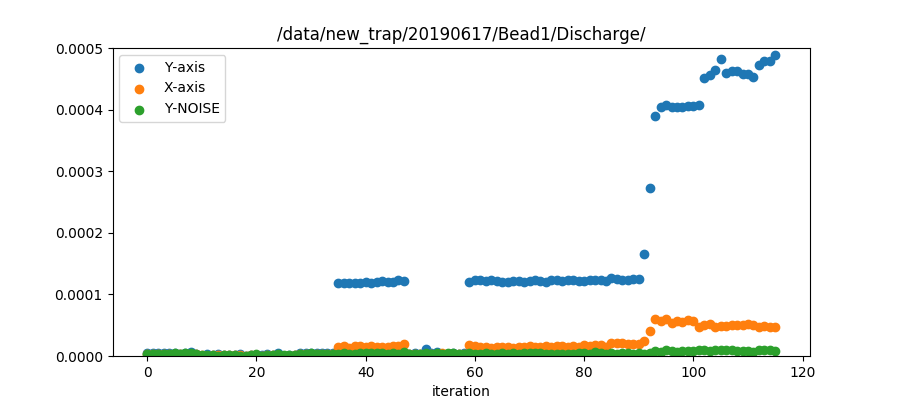

In [22]:
_,ax = plt.subplots(figsize=(9,4))
rrX = [np.std(resp_) for resp_ in responsesX]
rrY = [np.std(resp_) for resp_ in responsesY]
rrN = [np.std(resp_) for resp_ in responsesNoise]

ax.scatter(range(len(rrY)),rrY, label='Y-axis')
ax.scatter(range(len(rrX)),rrX, label='X-axis')
ax.scatter(range(len(rrN)),rrN, label='Y-NOISE')
ax.set(xlabel='iteration',ylim=(0,5e-4),title=folder)
ax.legend()

# Phase information

In [261]:
fname = r'/data/new_trap/20190624/Bead2/Discharge/Discharge_50.h5'
fname = r'/home/data_transfer/data_from_windows/20190625/Bead1/Shake2/Discharge_5.h5'
fname = r'/data/new_trap/20190701/Bead2/Discharge2/Discharge_44.h5'
# fname = r'/data/new_trap/20190701/Bead2/InitialTest/Data25.h5'
BDF_discharge = BeadDataFile.BeadDataFile(fname)

No cantilever data


<IPython.core.display.Javascript object>


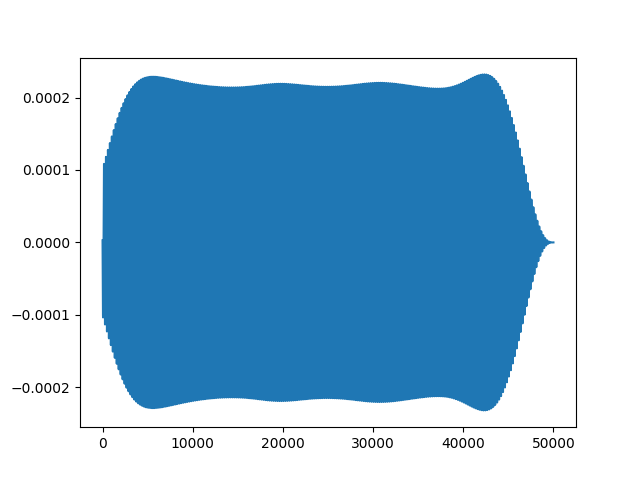

In [262]:
_,ax = plt.subplots()
ax.plot(range(50000), BDF_discharge.response_at_freq2('x',drive_freq=23,bandwidth=1))

<IPython.core.display.Javascript object>


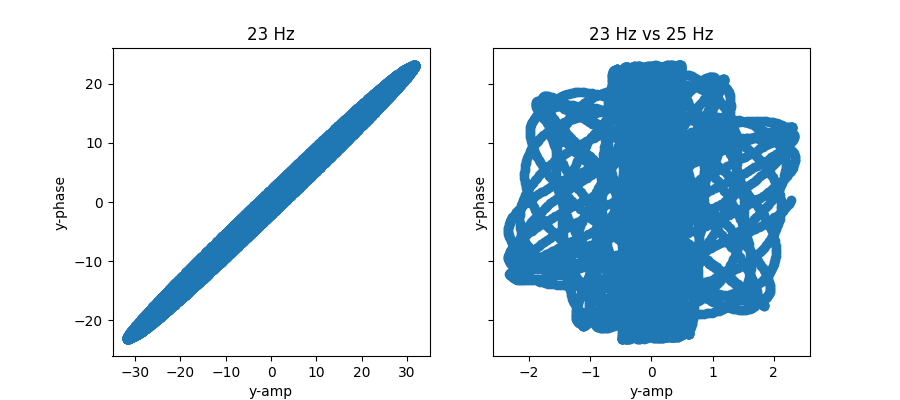

[Text(0, 0.5, 'y-phase'),
 Text(0.5, 0, 'y-amp'),
 Text(0.5, 1.0, '23 Hz vs 25 Hz')]

In [263]:
i = 0
Npoints = 50000
freq = 23
ypos_discharge = BDF_discharge.response_at_freq2('x',freq)[i*Npoints:(i+1)*Npoints]
yphase_discharge = BDF_discharge.response_at_freq3('x',freq)[i*Npoints:(i+1)*Npoints]
yphase_discharge2 = BDF_discharge.response_at_freq3('x',freq+2)[i*Npoints:(i+1)*Npoints]

_,ax = plt.subplots(1,2,figsize=(9,4), sharey=True)
ax[0].scatter(yphase_discharge, ypos_discharge*1e5)
ax[0].set(xlabel='y-amp',ylabel='y-phase',title='23 Hz')
ax[1].scatter(yphase_discharge2, ypos_discharge*1e5)
ax[1].set(xlabel='y-amp',ylabel='y-phase',title='23 Hz vs 25 Hz')

### No feedback data

In [265]:
fname = r'/data/new_trap/20190616/50000samples_1mbar_FeedbackOff_8dbm.h5'
BDF_1 = BeadDataFile.BeadDataFile(fname)

No cantilever data


<IPython.core.display.Javascript object>


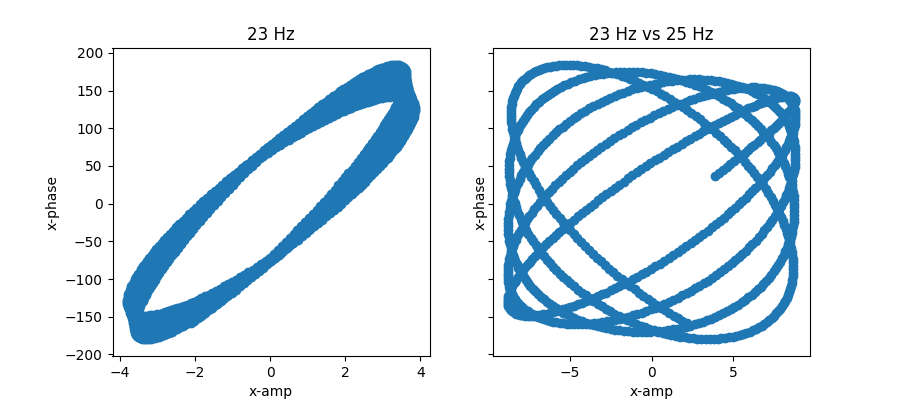

In [272]:
freq = 23
ypos_1 = BDF_1.response_at_freq2('y',freq)[:1000]
yphase_1 = BDF_1.response_at_freq3('y',freq)[:1000]
yphase_12 = BDF_1.response_at_freq3('y',freq+2)[:1000]

_,ax = plt.subplots(1,2,figsize=(9,4), sharey=True)
_ = ax[0].scatter(yphase_1, ypos_1*1e5)
_ = ax[0].set(xlabel='x-amp',ylabel='x-phase',title='23 Hz')
_ = ax[1].scatter(yphase_12, ypos_1*1e5)
_ = ax[1].set(xlabel='x-amp',ylabel='x-phase',title='23 Hz vs 25 Hz')

In [103]:
ypos1_segmented = np.std(ypos_discharge.reshape(-1, 1000), axis=1)
phase1_segmented = np.std(yphase_discharge.reshape(-1, 1000), axis=1)

<IPython.core.display.Javascript object>


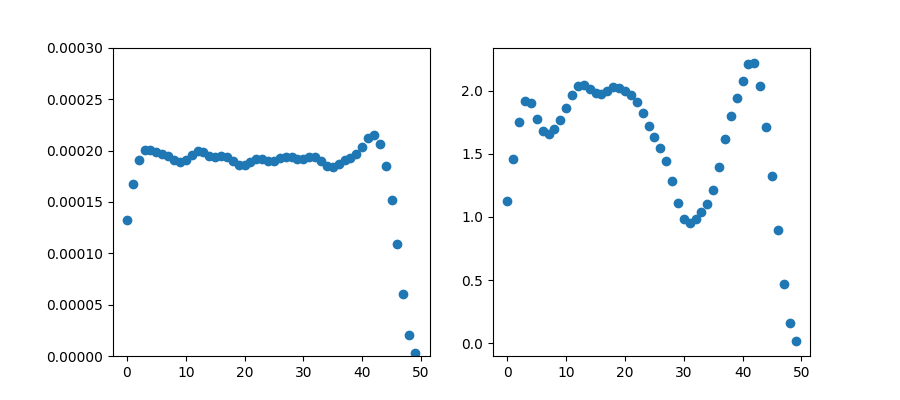

In [108]:
_,ax = plt.subplots(1,2,figsize=(9,4))
ax[0].scatter(range(len(ypos1_segmented)),ypos1_segmented)
ax[0].set(ylim=(0,3e-4))
ax[1].scatter(range(len(phase1_segmented)),phase1_segmented)

In [50]:
# Load basic functions
from scipy.signal import hilbert, butter, filtfilt
from scipy.fftpack import fft,fftfreq,rfft,irfft,ifft
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import matplotlib as mpl
import math
#sns.set_context('poster',font_scale=.8)
#sns.set_style('whitegrid')
#mpl.rc('figure',figsize=(15,2))

In [216]:
fname = r'/home/data_transfer/data_from_windows/20190624/Bead2/Shake/Discharge_50.h5'
BDF_discharge = BeadDataFile.BeadDataFile(fname)

In [602]:
fname = r'/home/data_transfer/data_from_windows/20190624/Bead2/Shake/Discharge_12.h5'
BDF_shake = BeadDataFile.BeadDataFile(fname)

# Correlation between phase and amp

In [6]:
def give_anlge(a,b,aa,bb):
    
    a_segmented = np.mean(a.reshape(-1, 500), axis=1)/aa
    b_segmented = np.mean(b.reshape(-1, 500), axis=1)/bb
    
    return a_segmented-b_segmented

In [7]:
def give_anlge2(a,b,aa,bb):
    
    norm = np.var(a.reshape(-1, 500),axis=1)+np.var(b.reshape(-1, 500),axis=1)
    a_segmented = np.mean(a.reshape(-1, 500), axis=1)/norm
    b_segmented = np.mean(b.reshape(-1, 500), axis=1)/norm
    
    return np.arctan(a_segmented/b_segmented)*1e4

In [8]:
def give_anlge3(a,b,aa,bb):
    norm = 1
    a = np.mean(a.reshape(-1, 500), axis=1)/norm
    b = np.mean(b.reshape(-1, 500), axis=1)/norm
    return np.arctan(a/(b))*1e4

In [9]:
def give_anlge4(a,b,aa,bb):
    norm = 1
    return np.arctan(a/(b))*1e4

In [10]:
def give_norm(a,b,aa,bb):
    
    norm = np.mean(np.var(a.reshape(-1, 500),axis=1)+np.var(b.reshape(-1, 500),axis=1))
    a_segmented = a/norm
    b_segmented = b/norm
    
    return norm

In [ ]:
fname = r'/data/new_trap/20190701/Bead2/Discharge2/Discharge_44.h5'
BDF_discharge = BeadDataFile.BeadDataFile(fname)
fname = r'/home/data_transfer/data_from_windows/20190625/Bead1/Shake2/Discharge_6.h5'
BDF_shake = BeadDataFile.BeadDataFile(fname)

In [198]:
BDF_discharge.x2.shape, BDF_discharge.cant_pos[1].shape

((50000,), (50000,))

<IPython.core.display.Javascript object>


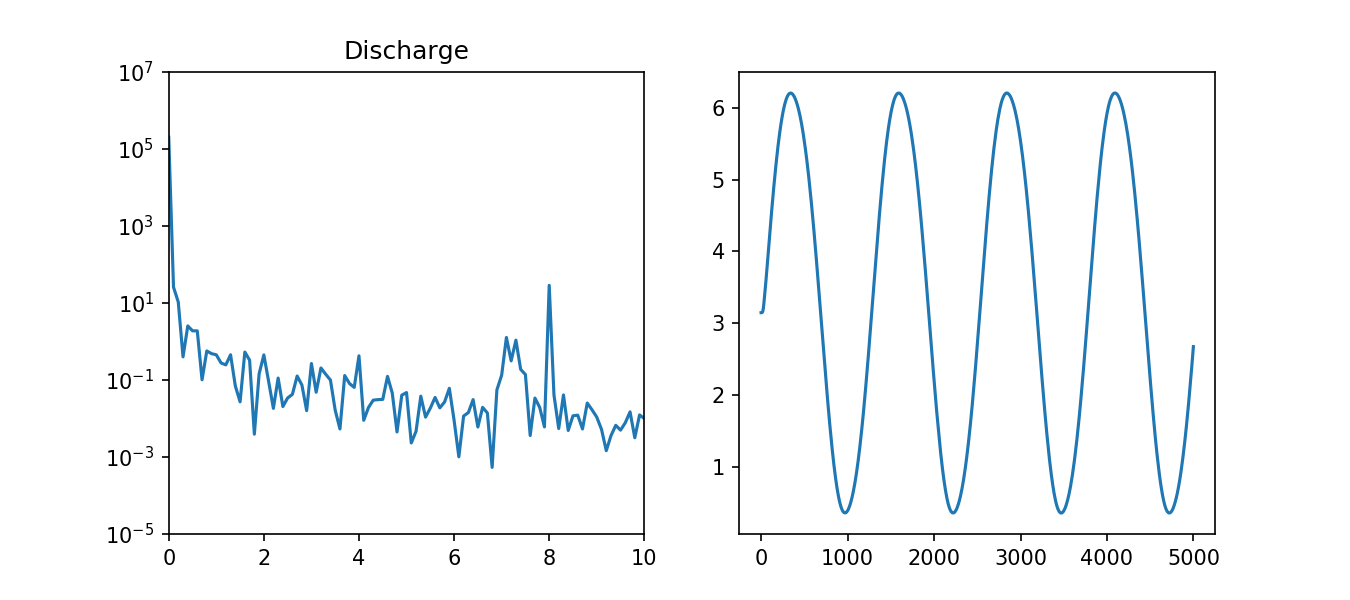

[[(1e-05, 10000000.0), (0, 10)]]

In [199]:
_,ax = plt.subplots(1,2,figsize=(9,4))
ax[0].semilogy(*BDF_discharge.psd2('x'))
ax[0].set(title='Discharge')
ax[1].semilogy(*BDF_shake.psd2('x'))
ax[1].set(title='Shake')
[a.set(xlim=(0,100), ylim=(1e-5,1e7)) for a in ax]

In [157]:
freq = 23
aa = np.std(BDF_discharge.response_at_freq2('x',freq))
bb = np.std(BDF_discharge.response_at_freq3('x',freq))

<IPython.core.display.Javascript object>


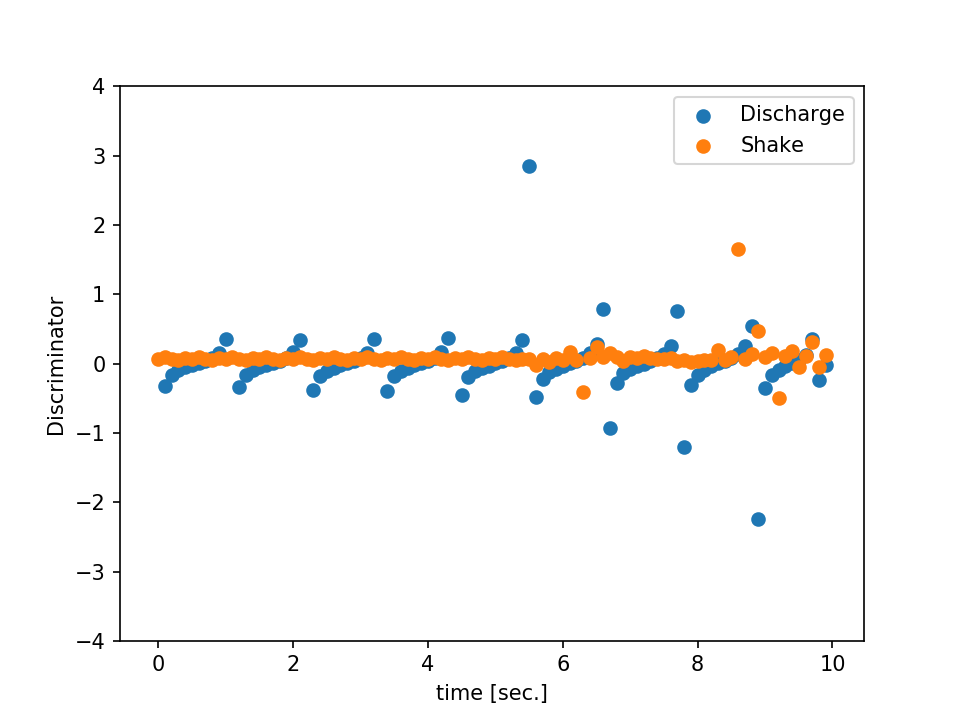

In [200]:
freq = 23
dischargeAngle = give_anlge2(BDF_discharge.response_at_freq2('x',freq), BDF_discharge.response_at_freq3('x',freq),aa,bb)
freq = 23
shakeAngle = give_anlge2(BDF_shake.response_at_freq2('x',freq), BDF_shake.response_at_freq3('x',freq),aa,bb)
_,ax = plt.subplots()
ax.scatter(0.1*np.arange(len(dischargeAngle)),dischargeAngle,label='Discharge')
ax.scatter(0.1*np.arange(len(shakeAngle)),shakeAngle,label='Shake')
ax.set(ylabel='Discriminator',xlabel='time [sec.]',ylim=(-4,4))
ax.legend()

In [788]:
give_norm(BDF_discharge.y2,BDF_discharge.y3,aa,bb), give_norm(BDF_shake.y2,BDF_shake.y3,aa,bb)

(1318.937330038684, 1590046.8042909873)

<IPython.core.display.Javascript object>


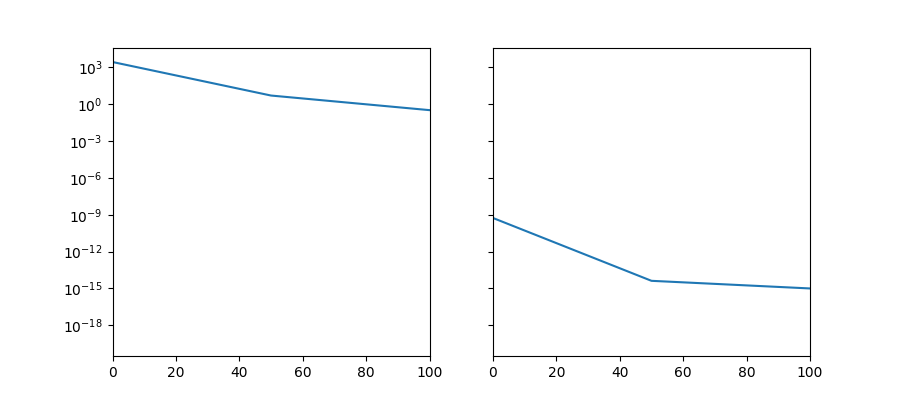

[[(0, 100)], [(0, 100)]]

In [295]:
x = give_anlge3(BDF_discharge.x2,BDF_discharge.x3,aa,bb)
fft_discharge = np.abs(np.fft.rfft(x))**2
x = give_anlge3(BDF_shake.x2,BDF_shake.x3,aa,bb)
fft_shake = np.abs(np.fft.rfft(x))**2

freq = np.fft.rfftfreq(len(x), d=1./5000)
_,ax = plt.subplots(1,2,figsize=(9,4), sharey=True)
ax[0].semilogy(freq, fft_discharge)
ax[1].semilogy(freq, fft_shake)
[a.set(xlim=(0,100)) for a in ax]

In [1031]:
all_discharge = load_dir(r'/data/new_trap/20190625/Bead1/Discharge/')

90  files in folder
90  files loaded


In [1032]:
freq = 23
dis_angles = [np.std(give_anlge3(B_.response_at_freq2('y',freq), B_.response_at_freq3('y',freq),aa,bb)) for B_ in all_discharge]

In [1034]:
all_shake = load_dir(r'/home/data_transfer/data_from_windows/20190625/Bead1/Shake2/')

21  files in folder
21  files loaded


In [1035]:
freq = 23
shake_angles = [np.std(give_anlge3(B_.response_at_freq2('y',freq), B_.response_at_freq3('y',freq),aa,bb)) for B_ in all_shake]

<IPython.core.display.Javascript object>


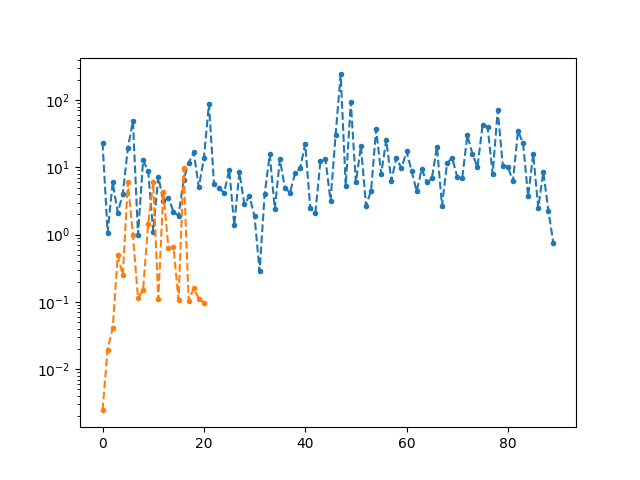

In [1036]:
_,ax = plt.subplots()
ax.semilogy(range(len(dis_angles)),dis_angles,'.--')
ax.semilogy(range(len(shake_angles)),shake_angles,'.--')